In [1]:
import torch

In [2]:
# New tensors are stored in main memory and designated for CPU-based computation by default
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
# To get the total number of elements
x.numel()

12

In [4]:
x.shape

torch.Size([12])

In [5]:
X = x.reshape(3,4)
X
# because you can infer one dimension size you could have just used reshape(-1,4) or reshape(3,-1)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [6]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [7]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [8]:
# To create a tensor with elements drawn from a standard Gaussian (normal) distribution with mean 0
# and standard deviation 1
torch.randn(3,4)

tensor([[ 0.6681, -0.7639,  1.1909, -0.7393],
        [ 0.2038, -0.8445, -0.3800, -0.1450],
        [ 0.5950,  0.2491, -1.6102, -1.4176]])

In [9]:
# To initiate a tensor with values
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [10]:
# We can concatenate tensors along one axis
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [11]:
# Construct a binary tensor via logical statements
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [12]:
# to sum all the elemnts in the tensor
X.sum()

tensor(66.)

In [13]:
# BroadCasting is done when you want to perform elementwise binary operations
# On tensors with different shapes. The following procedure is
# (i) expand one or both arrays by copying elements along axes with length 1
# so that after this transformation, the two tensors have the same shape;
#(ii) perform an elementwise operation on the resulting arrays.
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [14]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [15]:
# To operate in place we use the [:] notation
# id gives you the id of the memory space used
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 2367725065616
id(Z): 2367725065616


In [16]:
# also we can use X += Y
before = id(X)
X += Y
id(X) == before

True

In [17]:
#Converting to a NumPy tensor (ndarray), or vice versa, is easy. 
# The torch tensor and NumPy array will share their underlying memory,  
#and changing one through an in-place operation will also change the other.
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [18]:
# Also we can convert a tensor of size 1 to a python scalar
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

# Exercises 2.1

1. Run the code in this section. Change the conditional statement X == Y to X < Y or X > Y, and then see what kind of tensor you can get.

In [19]:
X>Y

tensor([[False,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

2. Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?

In [20]:
a = torch.arange(12).reshape((3,2,2))
b = torch.arange(6).reshape((3,1,2))
a,b

(tensor([[[ 0,  1],
          [ 2,  3]],
 
         [[ 4,  5],
          [ 6,  7]],
 
         [[ 8,  9],
          [10, 11]]]),
 tensor([[[0, 1]],
 
         [[2, 3]],
 
         [[4, 5]]]))

In [21]:
a+b
# Yes the result is as expected

tensor([[[ 0,  2],
         [ 2,  4]],

        [[ 6,  8],
         [ 8, 10]],

        [[12, 14],
         [14, 16]]])

# 2.2 Data Preprocessing

In [22]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [23]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [24]:
# For categorical values like RoofType we can treat NaN as a category

inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN           False          True
1       2.0           False          True
2       4.0            True         False
3       NaN           False          True


In [25]:
# For missing numerical values we can compute the mean value of the column
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


In [26]:
# we can convert the vectors to tensors
import torch
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X,y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

# 2.2 Data Processing exercises

1. Try loading datasets, e.g., Abalone from the UCI Machine Learning Repository and inspect their properties. What fraction of them has missing values? What fraction of the variables is numerical, categorical, or text?


- The sex is a categorical variable
- All the rest of the values are numerical
- There are no missing values

In [27]:
import pandas as pd
col_names = ['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']
df = pd.read_csv('abalone.data', names = col_names)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [28]:
df.isnull().sum()
# There are 0 values null

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

2. Try indexing and selecting data columns by name rather than by column number. The pandas documentation on indexing has further details on how to do this.


In [29]:
df["Sex"]

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

# 2.3 Linear Algebra

In [30]:
import torch

#scalars are implemented as tensors that contain only one element
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x+y, x*y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [31]:
A = torch.arange(6).reshape(3,2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [32]:
# To get the transpose
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [33]:
# Element-wise operations on tensors produce outputs with the same shape as their operands
A = torch.arange(6, dtype=torch.float32).reshape(2,3)
B = A.clone()
A, A+B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [34]:
# Element-wise product of two matrices is called Hadamard product
A*B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [35]:
# calculate the sum of a tensor's elements
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [36]:
# to sum along one axis
A, A.sum(axis=0), A.shape, A.sum(axis=0).shape

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([3., 5., 7.]),
 torch.Size([2, 3]),
 torch.Size([3]))

In [37]:
# to get the average
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

In [38]:
# Or the average along one axis
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

In [39]:
# To keep the shape when invoking sum or mean we use
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

In [40]:
# Keeping the shape is useful when you want to use broadcasting (operate with tensors of diff dims)
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

In [41]:
# To get the cumulative sum of elements along some axis
A.cumsum(axis=0)

tensor([[0., 1., 2.],
        [3., 5., 7.]])

In [42]:
# Dot Product (between two vectors)
y = torch.ones(3, dtype= torch.float32)
x,y, torch.dot(x,y)


(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [44]:
# the matrix-vector product can be calculated using .mv() or the @ that also
# can do the product between two matrices
A.shape, x.shape, torch.mv(A,x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

In [45]:
# matrix-matrix product
B = torch.ones(3,4)
torch.mm(A,B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

In [46]:
# to calculate the l_2 norm
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [47]:
# to calculate the l1 norm
torch.abs(u).sum()

tensor(7.)

In [48]:
# to calculate the Frobenius norm
torch.norm(torch.ones((4,9)))

tensor(6.)

# 2.4 Calculus

In [1]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l


In [2]:
# the #@save allow us to save the function to the d2l package and invoke the function via
# d2l.function
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [3]:
# from matplotlib import pyplot as plt was marked via #@save in the d2l package, so we can call d2l.plt
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [4]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [6]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

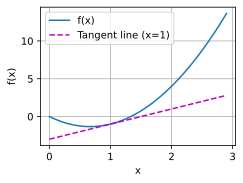

In [8]:
def f(x):
    return 3 * x ** 2 - 4 * x
x = np.arange(0,3,0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

# 2.5 Automatic differentiation

In [14]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [15]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [16]:
# y = 2 x^T x
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [17]:
# we call the backward method to get the gradient
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [18]:
# The gradient of 2x^Tx with respect to x should be 4x
x.grad == 4*x

tensor([True, True, True, True])

In [19]:
# By default PyTorch does not reset de gradient buffer. This is helpful when
# we want to optimize the sum of multiple objective functions (sum rule)
x.grad.zero_() # reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [20]:
# Backwards for non-scalar values
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [21]:
# Detaching computation: Let's suppose you have z = x* y and y = x* x, but you only want
# to know how x affects directly z without y. For that we can replace y with u, so there is 
# no relation between x and y. So the gradient is not 3*x*x but u
x.grad.zero_()
y = x*x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

# 2.6 Probability and Statistics

In [24]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [25]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [44, 56]


In [27]:
# Alternatively you can use the multinomial function
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([57., 43.])

In [31]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5100, 0.4900])

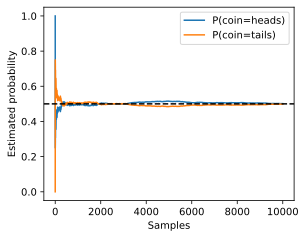

In [32]:
# the more repetitions the estimates converge to the true underlying probabilities
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();